In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from feature_engine.outliers import Winsorizer
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [14]:
df=pd.read_csv("D:/Documents/Datasets/Company_data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [15]:
df.shape

(400, 11)

In [16]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [18]:
df.Sales.unique()

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  8.85, 13.39,  7.99,  9.46,  6.5 ,  5.52, 12.61,
        8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,  7.52, 11.62,  2.23,
        8.7 , 11.7 ,  6.56,  7.95,  5.33,  4.81,  4.53,  8.86,  8.39,
        5.58,  9.48,  7.45, 12.49,  4.88,  4.11,  5.3 ,  5.07,  4.62,
        5.55,  0.16,  3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,
        8.54,  8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,
        9.34, 11.27,  6.52,  4.96,  4.47,  8.41,  9.54,  7.62,  3.67,
        6.44,  5.17,

In [19]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [20]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


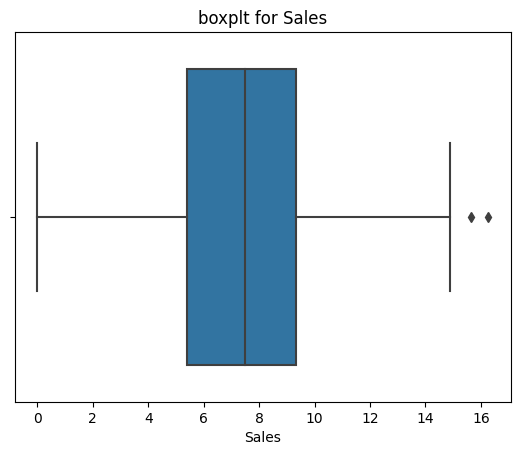

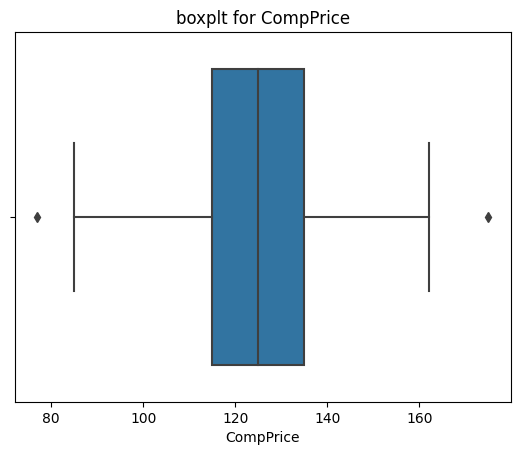

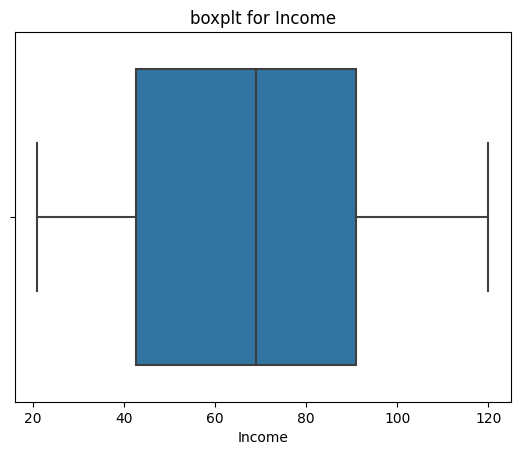

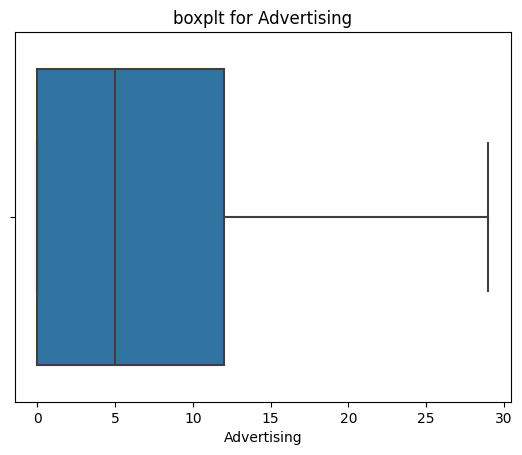

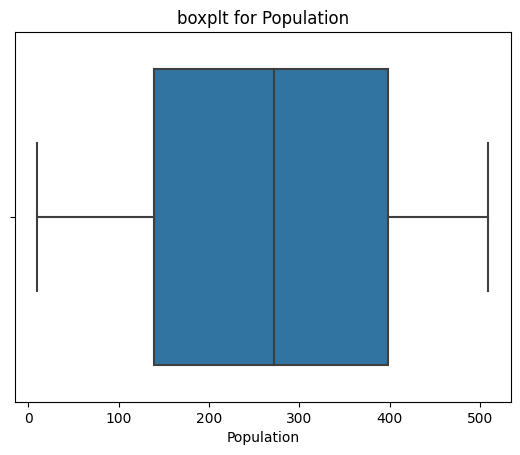

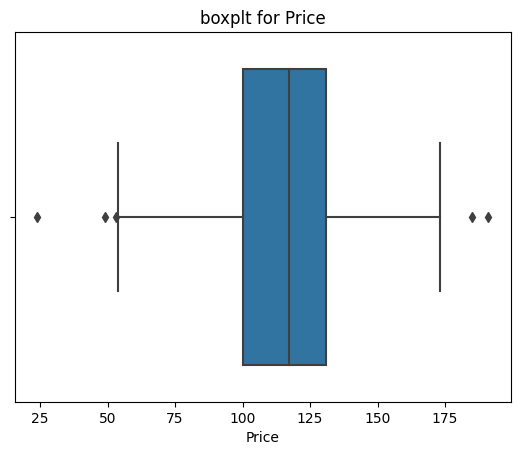

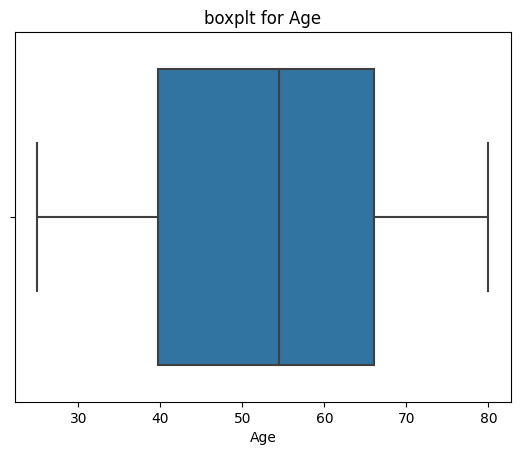

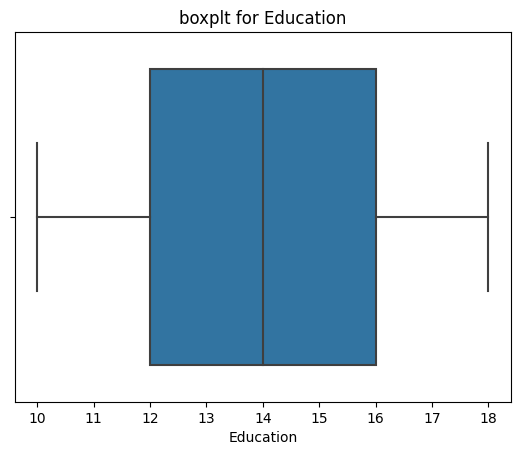

In [21]:
num=df.select_dtypes(include=["int64","float64"]).columns
for col in num:
    sns.boxplot(x=df[col])
    plt.title(f"boxplt for {col}")
    plt.show()

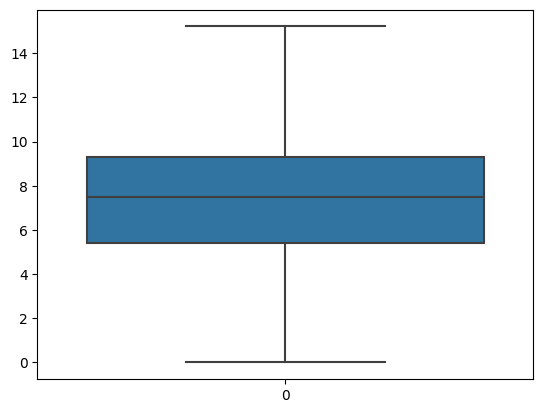

In [26]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=["Sales"],tail="both")
df["Sales"]=winsor.fit_transform(df[["Sales"]])
sns.boxplot(df["Sales"])
plt.show()

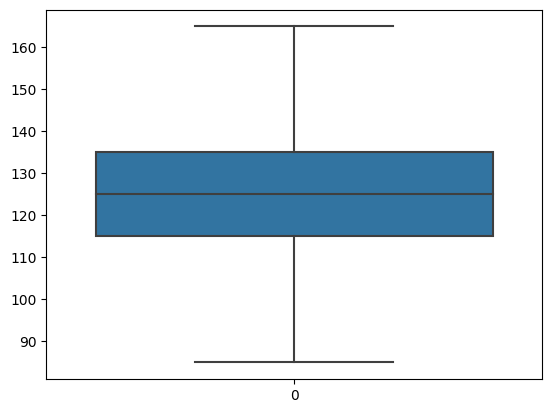

In [27]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=["CompPrice"],tail="both")
df["CompPrice"]=winsor.fit_transform(df[["CompPrice"]])
sns.boxplot(df["CompPrice"])
plt.show()

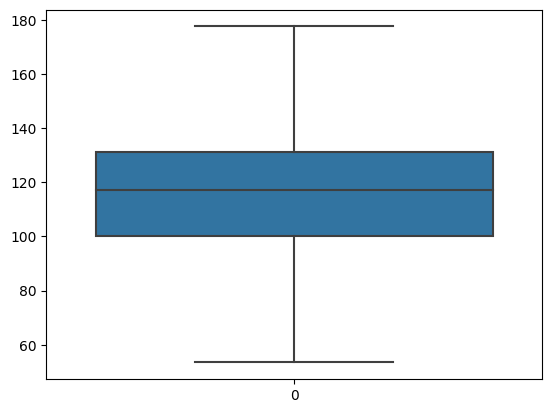

In [28]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=["Price"],tail="both")
df["Price"]=winsor.fit_transform(df[["Price"]])
sns.boxplot(df["Price"])
plt.show()

In [29]:
for i in df["Sales"]:
    if i>8:
        df["Sales"]=np.where(df["Sales"]==i,1,df["Sales"])
    else:
        df["Sales"]=np.where(df["Sales"]==i,0,df["Sales"])

In [30]:
df.Sales.value_counts()

Sales
0.0    236
1.0    164
Name: count, dtype: int64

In [31]:
inputs=df.drop(["Sales"],axis=1)

In [32]:
target=df["Sales"]

In [33]:
lb=LabelEncoder()

In [34]:
inputs["ShelveLoc"]=lb.fit_transform(inputs["ShelveLoc"])
inputs["Urban"]=lb.fit_transform(inputs["Urban"])
inputs["US"]=lb.fit_transform(inputs["US"])

In [35]:
inputs.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120.0,0,42,17,1,1
1,111,48,16,260,83.0,1,65,10,1,1
2,113,35,10,269,80.0,2,59,12,1,1
3,117,100,4,466,97.0,2,55,14,1,1
4,141,64,3,340,128.0,0,38,13,1,0


In [36]:
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2)

In [37]:
model=DT()

In [38]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [39]:
y_pred=model.predict(x_test)
y_pred

array([1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.])

In [40]:
acc=accuracy_score(y_test,y_pred)
acc

0.825